# Skin Cancer Dataset 


## Import Libraries

Firstly, we import libraries as we will need them through the project. Start from data exploration, cleaning, visualization. Data is downoaded from Kaggle and containes two folders with images and flat files providing us with charateristics of the cancer, which are to be matched with the image.

In [3]:
%matplotlib inline
# python libraties
import os, itertools
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from skimage.io import imread #to upload images

from sklearn.model_selection import train_test_split

# to make the results are reproducible
np.random.seed(10)
print(os.listdir("../input"))

['.ipynb_checkpoints', 'HAM10000_images_part_1', 'HAM10000_images_part_2', 'HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'hmnist_28_28_RGB.csv', 'hmnist_8_8_L.csv', 'hmnist_8_8_RGB.csv', 'Untitled.ipynb']


## Import data, preprocess 

Let's firstly only work with text data from csv file 

In [4]:
data_dir = '../input'
all_image_path = glob(os.path.join(data_dir, '*', '*.jpg'))
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in all_image_path}
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

There're 7 different classes of skin cancer which we labeled in the previous step. Put the charateristics from the csv into the dataframe and explore it.

In [5]:
df_genuine = pd.read_csv(os.path.join(data_dir, 'HAM10000_metadata.csv'))
df_genuine['path'] = df_genuine['image_id'].map(imageid_path_dict.get)
df_genuine['cell_type'] = df_genuine['dx'].map(lesion_type_dict.get)
df_genuine['cell_type_idx'] = pd.Categorical(df_genuine['cell_type']).codes
df_genuine.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input\HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input\HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input\HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input\HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input\HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,2


Next step is to check for missing values and think on a possible ways of dealing if we have some 

In [8]:
df_genuine.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

Statistics above showed us that in out dataset we have missing values only on the age variable, it is quite easy to replace it with mean. I changed the data type of column to integer, because it looked terrible on graphs.

In [35]:
df_genuine['age'].fillna((df_genuine['age'].mean()), inplace=True)
df_genuine.isnull().sum()
df_genuine = df_genuine.astype({"age": int})

In [36]:
print(df_genuine.dtypes)

lesion_id        object
image_id         object
dx               object
dx_type          object
age               int32
sex              object
localization     object
path             object
cell_type        object
cell_type_idx      int8
dtype: object


In [37]:
df_genuine.describe()

,age,cell_type_idx
count,10015.000000,10015.000000
mean,51.858912,3.720919
std,16.920377,1.347499
min,0.000000,0.000000
25%,40.000000,4.000000
50%,50.000000,4.000000
75%,65.000000,4.000000
max,85.000000,6.000000


In [14]:
df_genuine.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,10015,7
top,HAM_0000835,ISIC_0028963,nv,histo,male,back,../input\HAM10000_images_part_1\ISIC_0025174.jpg,Melanocytic nevi
freq,6,1,6705,5340,5406,2192,1,6705


The table above is helpful in exploring our dataset. Firstly, as mentioned in the dataset description we have 7 different types of cancer in 15 locations. There're no duplicates among images, however there're around 2500 duplicates in lesion. !!! Important implication, think what you gonna do with it.

## Visualization

1)Cancer by age in the dataset 

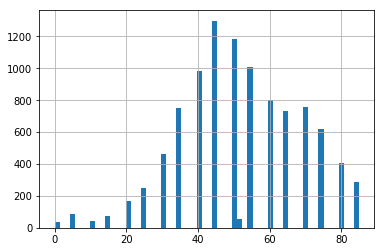

In [39]:
df_genuine['age'].hist(bins=60)

Most affected: 40-60. It is not totally balanced, it is rounded to 5 little bar is what we replaced by mean (51).

2)Representation of males/females/sex in the database 

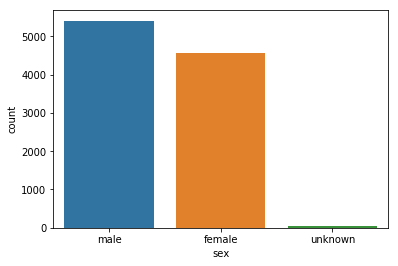

In [42]:
sns.countplot(df_genuine['sex'])

Almost equally distributed 

3)Visualization by sex and age

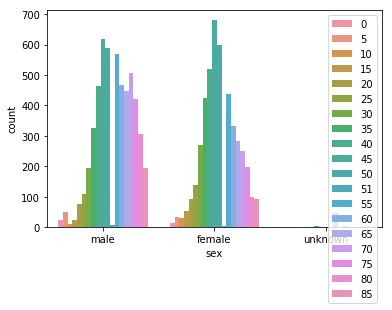

In [38]:
sns.countplot(x='sex',hue='age',data=df_genuine)
plt.legend(loc='upper right')

4)Distribution of localization

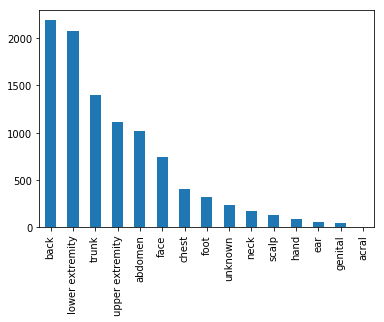

In [44]:
df_genuine['localization'].value_counts().plot(kind='bar')

5)Types of cancer

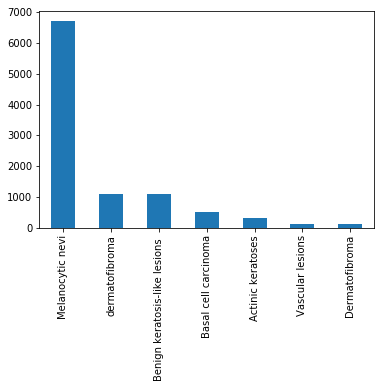

In [45]:
df_genuine['cell_type'].value_counts().plot(kind='bar')

Heavily unbalanced

6) Explore the distribution of how the cancer was diagnosed. There are 4 types of technical validations, stored in the column dx_type: Histopathology, Confocal, Follow-up, Consensus.

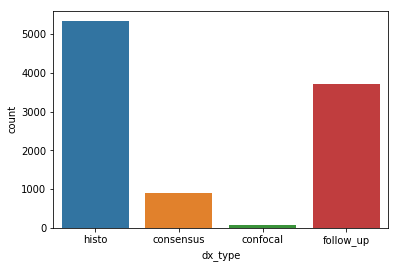

In [6]:
sns.countplot(df_genuine['dx_type'])

7) Type of cancer by sex

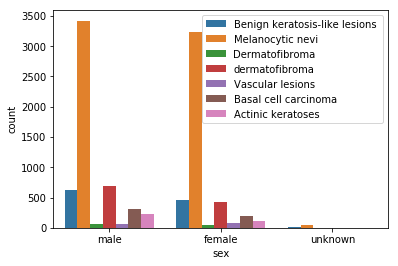

In [9]:
sns.countplot(x='sex',hue='cell_type',data=df_genuine)
plt.legend(loc='upper right')

8)Scatterplot of cancer type by age coloured by sex 

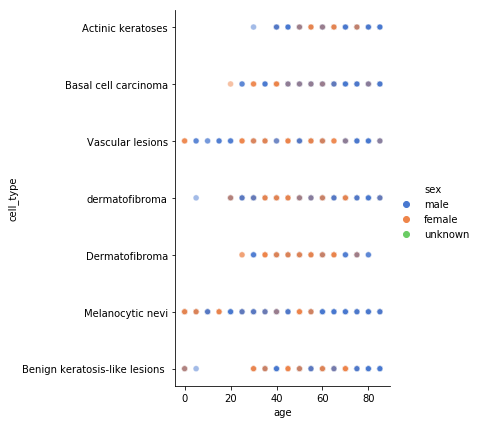

In [12]:
sns.relplot(x="age", y="cell_type", hue="sex",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_genuine)

A couple of interesting applicationts can be drawn from the graph above, specifically regarding the starting age of cancer. There're no cases of actinic keratoses, basal cell carcinoma and dermatofidroma among people younger than 30 in the dataset. Dermatofibroma is more common among women while melanocytic nevi among 60+ men

## Mapping with images

In [15]:
df_genuine['image'] = df_genuine['path'].map(imread)

In [19]:
df_genuine.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input\HAM10000_images_part_1\ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input\HAM10000_images_part_1\ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input\HAM10000_images_part_1\ISIC_0026769.jpg,Benign keratosis-like lesions,2,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input\HAM10000_images_part_1\ISIC_0025661.jpg,Benign keratosis-like lesions,2,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input\HAM10000_images_part_2\ISIC_0031633.jpg,Benign keratosis-like lesions,2,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


In [18]:
df_genuine['image'].map(lambda x: x.shape).value_counts()


(450, 600, 3)    10015
Name: image, dtype: int64

**Getting 5 images of each cancer type**

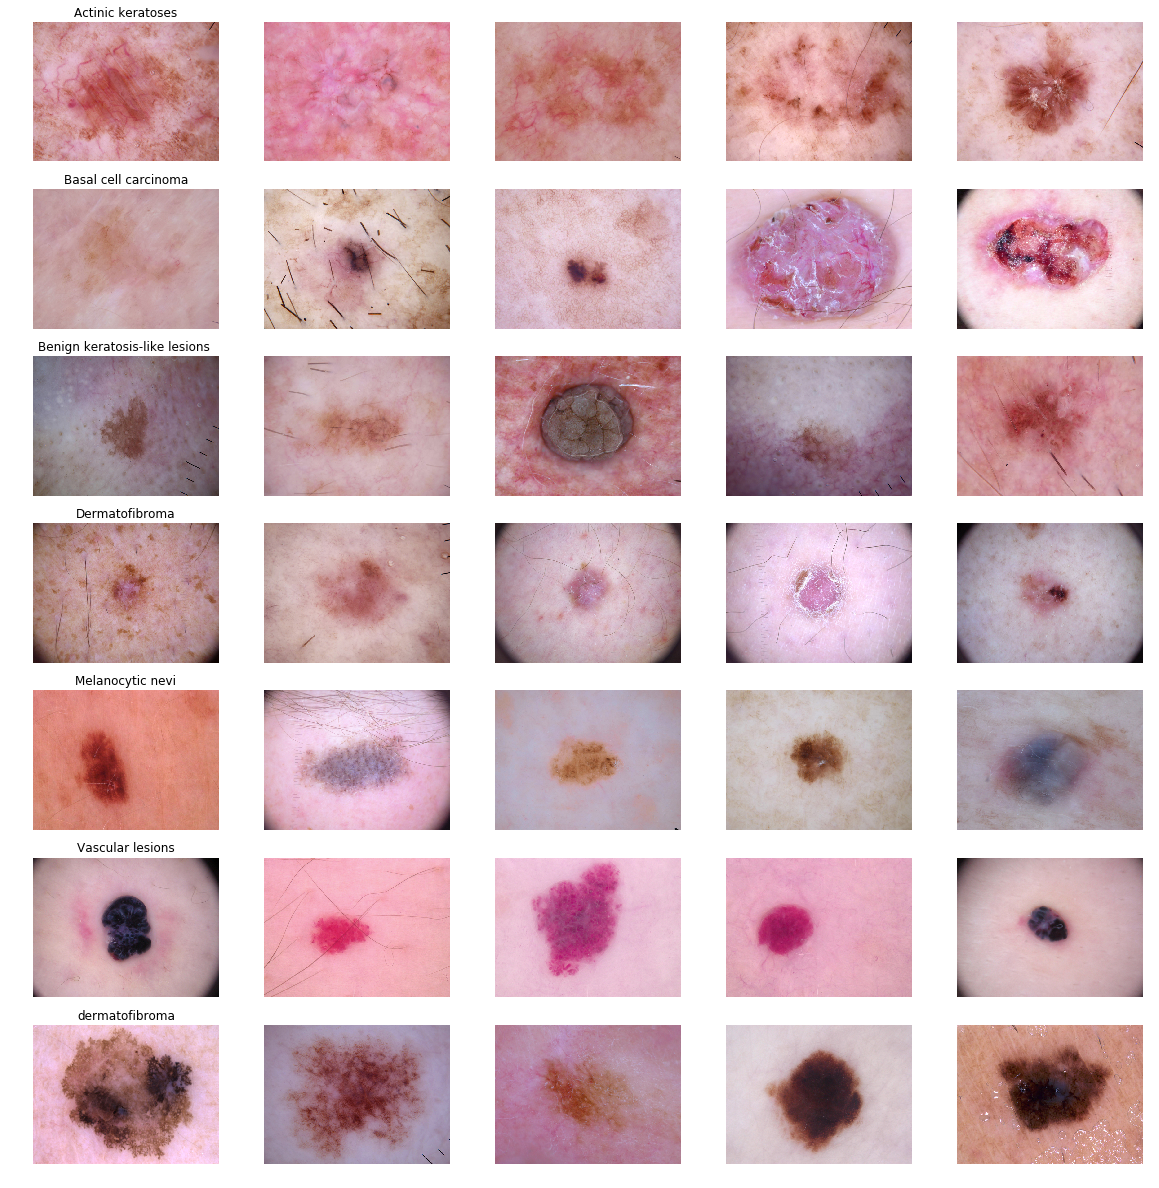

In [21]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df_genuine.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

#Think about possible data augmentation techniques

## Train test split

In [25]:
features=df_genuine['image']
target = df_genuine['cell_type_idx']

In [26]:
x_train, x_test, y_train, y_test= train_test_split(features, target, 
                                                   test_size=0.2,random_state=1234)